## Linear Regression Model

### Data Preparation

#### Import necessary libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
import joblib

### Load and preprocess data

In [97]:
# Load and preprocess data
data = pd.read_csv(r'C:\Users\jkmfi\Documents\ComputingIndiualResarchProject\expense_data.csv')
data = data.dropna()  # Handle missing values

In [98]:
data.head()

,Transaction ID,Date,Month,Weekday,Year,Category,Sub Category,Amount,Payment Method,Merchant
0,f09fb684-3f3a-4f66-b33f-23f82b03cd65,28-01-2022,1,4,2022,Utilities,Internet,4947.94,Credit Card,Merchant B
1,b1b5ab6f-f479-4922-9565-a36269d40891,16-01-2022,1,6,2022,Entertainment,Games,604.64,Cash,Merchant E
2,5855da2b-160b-4257-aefa-ff908bf3e7b4,15-01-2022,1,5,2022,Groceries,Vegetables,3099.04,Debit Card,Merchant D
3,c99916b2-5ffa-4da4-9079-88abec10bb33,18-01-2022,1,1,2022,Rent,Deposit,1313.13,Cash,Merchant A
4,7ebc080e-fc89-4a2b-b787-9cf8ca722f96,01-01-2022,1,5,2022,Shopping,Clothes,3994.38,Cash,Merchant C


In [103]:
# Cyclical encoding for 'Weekday'
data['Weekday_sin'] = np.sin(2 * np.pi * data['Weekday'] / 7)
data['Weekday_cos'] = np.cos(2 * np.pi * data['Weekday'] / 7)

In [104]:
# Drop the original 'Weekday' column
data = data.drop(columns=['Weekday'])

In [105]:
# Apply frequency encoding for high cardinality 'Merchant' feature
data['Merchant'] = data['Merchant'].map(data['Merchant'].value_counts())


In [106]:
# One-hot encode categorical variables (excluding 'Merchant' which is already encoded)
categorical_columns = ['Category', 'Sub Category', 'Payment Method']
data = pd.get_dummies(data, columns=categorical_columns)

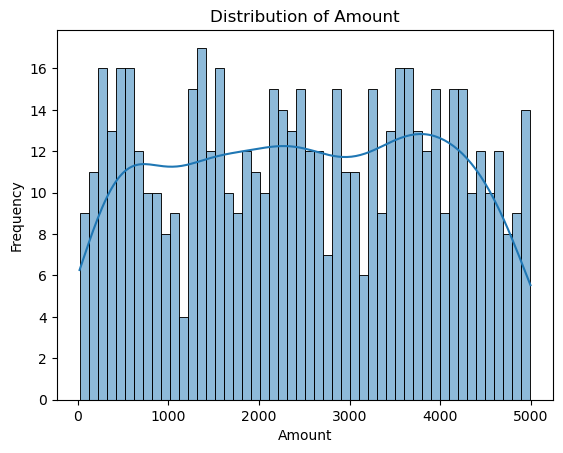

In [107]:
# Plot distribution of 'Amount'
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [108]:
# If the distribution is skewed, apply a log transformation
data['Log_Amount'] = np.log1p(data['Amount'])  # log(Amount + 1) to handle zero values


In [109]:
# Replace target with transformed target
y = data['Log_Amount']
X = data.drop(columns=['Amount', 'Log_Amount', 'Transaction ID', 'Date'])

## Train the Linear Regression Model

#### Initialize and train the model

In [121]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

Linear Regression Evaluation:
Mean Absolute Error (MAE): 555.1593255609456
Mean Squared Error (MSE): 478132.53266178444
R-squared (R2): 0.7549107331892841



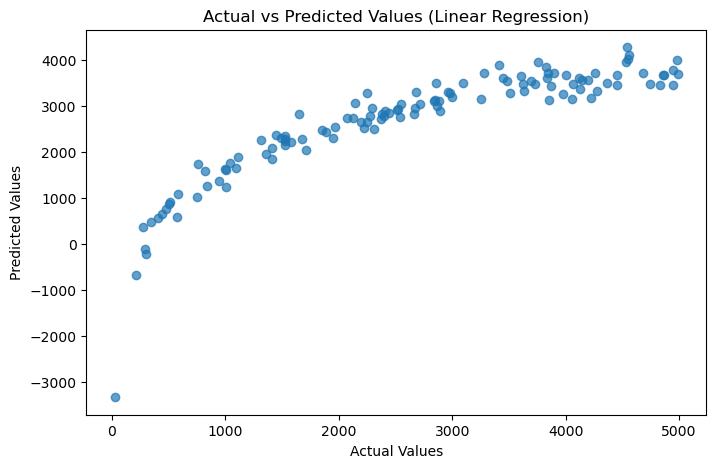

Ridge Regression Evaluation:
Mean Absolute Error (MAE): 546.4789921727413
Mean Squared Error (MSE): 467394.19026527
R-squared (R2): 0.7604151744998817



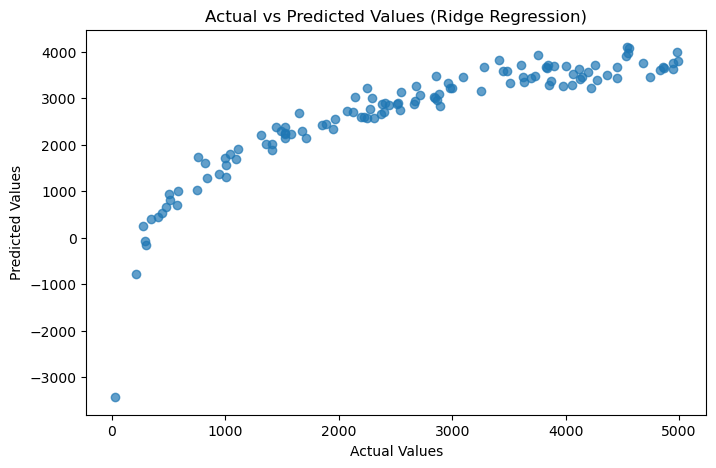

Lasso Regression Evaluation:
Mean Absolute Error (MAE): 545.247857460138
Mean Squared Error (MSE): 465317.5125289002
R-squared (R2): 0.7614796731253476



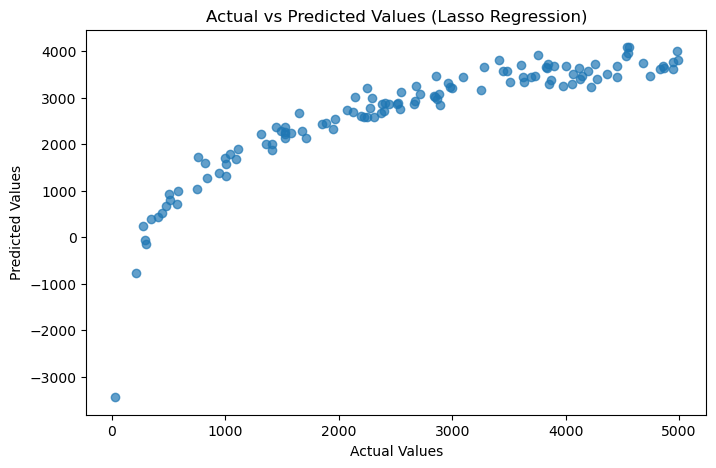

In [122]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}\n")

    # Plot actual vs predicted values
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values ({name})')
    plt.show()

### Hyperparameter Tuning for Ridge and Lasso:

In [125]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Ridge and Lasso
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_
print("Best parameters for Ridge:", ridge_cv.best_params_)

# Lasso Regression
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
best_lasso = lasso_cv.best_estimator_
print("Best parameters for Lasso:", lasso_cv.best_params_)

# Evaluate the best models
for name, model in [("Tuned Ridge", best_ridge), ("Tuned Lasso", best_lasso)]:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}\n")


Best parameters for Ridge: {'alpha': 10}
Best parameters for Lasso: {'alpha': 100}
Tuned Ridge Evaluation:
Mean Absolute Error (MAE): 551.7285493856549
Mean Squared Error (MSE): 469744.8945040822
R-squared (R2): 0.7592102107314219

Tuned Lasso Evaluation:
Mean Absolute Error (MAE): 555.4908812345649
Mean Squared Error (MSE): 441635.88471522793
R-squared (R2): 0.773618802762533



C:\Users\jkmfi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.235e+06, tolerance: 8.061e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\jkmfi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.079e+05, tolerance: 7.945e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\jkmfi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.816e+05, toleranc

####  Make predictions

#### Evaluate the model

In [126]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

MAE: 555.4908812345649
MSE: 441635.88471522793
R² Score: 0.773618802762533


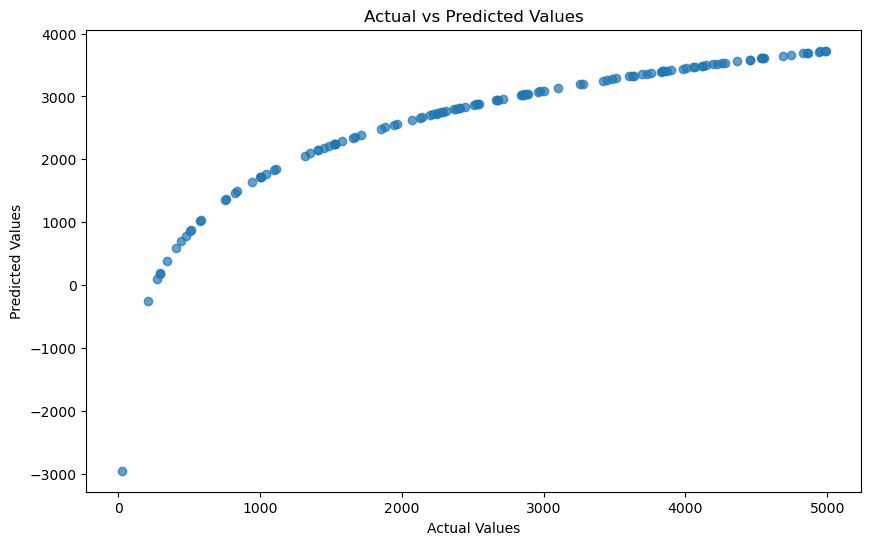

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [132]:
# Save the best-performing Lasso Regression model (or replace with the model you prefer)
joblib.dump(best_lasso, 'LinearRegression.pkl')

print("Model saved successfully!")

Model saved successfully!
